### **Imports and Mount**

In [ ]:
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Let's visualize some images**

In [ ]:
transform_vanilla = transforms.Compose([transforms.ToTensor(),
  transforms.ToPILImage(),
  transforms.Resize((224,224)),
  transforms.ToTensor()])
images_data = torchvision.datasets.ImageFolder("/content/drive/My Drive/ECE324 project/data", transform=transform_vanilla)
dataloader = DataLoader(images_data, shuffle=False, batch_size=len(images_data),num_workers=2)
                                                                              
def imshow(img):                                      
    img = img / 2 + 0.5  # unnormalize                
    npimg = img.numpy()
    fig = plt.figure(figsize = (10, 5))                                
    plt.imshow(np.transpose(npimg, (1, 2, 0)))        
    plt.show()                                                                                                  

#collect random 8 images                                                              
train_loader = DataLoader(images_data, batch_size=8, shuffle=True)                                                                
classes = ['ri_A', 'ri_B', 'ri_O', 'ri_R', 'ri_S', 'ro_A', 'ro_B','ro_O','ro_R','ro_S','ur_A','ur_B','ur_O','ur_R','ur_S']                          
dataiter = iter(train_loader)                                                         
images, labels = dataiter.next()                                                      
imshow(torchvision.utils.make_grid(images))                             
print(' '.join('%8s' % classes[labels[j]] for j in range(8)))  

### **Data analysis--> Counting number of samples in each class**

In [ ]:
labels = []
count = 0
fruits = ['A','B','O','R','S']
for i in range(len(fruits)):
  for directory_path, folders_inside, files in os.walk('/content/drive/My Drive/ECE324 project/data/{}'.format(fruits[i])):
      if directory_path.endswith('/'):
          continue
      else:
          labels.append({directory_path.split('/')[-1]: 0})
      num_of_files = 0
      for filename in files:
          num_of_files += 1
      labels[count][directory_path.split('/')[-1]] = num_of_files
      count += 1
indices = []
for i in range(len(labels)):
  element = labels[i]
  for j in element:
    if j == 'A' or j == 'B' or j == 'O' or j == 'R' or j == 'S':
      indices.append(i)
for j,i in enumerate(indices):
  del labels[i-j]  
print('{}            {}'.format('Label', 'Number of samples'))
print("--------------------------------------")
for element in labels:
      [(key, value)] = element.items()
      print('{:<10}         {:<10}'.format(key, value))

Label            Number of samples
--------------------------------------
ri_A               1331      
ro_A               2944      
ur_A               1500      
ri_B               1963      
ro_B               2758      
ur_B               1500      
ro_O               2003      
ri_O               1811      
ur_O               1500      
ri_R               2000      
ro_R               1250      
ur_R               1500      
ro_S               1489      
ri_S               1472      
un_S               1088      
Strawberry         492       
Flesh              258       


### **Data visualization- Bar chart to see if data is balanced**

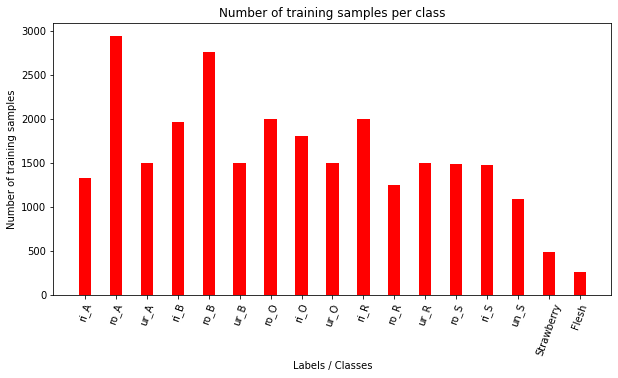

In [ ]:
frequency = []
label = []
for element in labels:
    [(key, value)] = element.items()
    frequency.append(value)
    label.append(key)
num_of_labels = len(frequency)

fig = plt.figure(figsize = (10, 5)) 
plt.bar(range(num_of_labels), frequency,color ='red',  width = 0.4)
plt.xticks(range(num_of_labels), label, rotation = 70)
plt.title('Number of training samples per class')
plt.xlabel("Labels / Classes")
plt.ylabel("Number of training samples")
plt.show()


### **Data visualization - Quick Pie chart to visualize percentages**

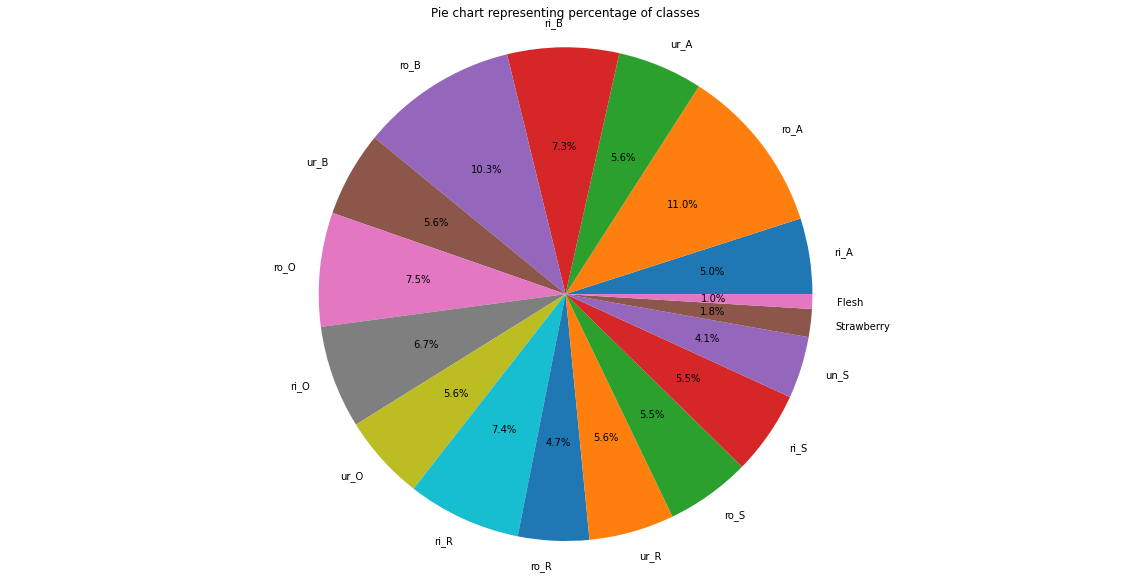

In [ ]:
# Convert list of dictionaries to single dictionary
label_dict = {}
for d in labels:
  label_dict.update(d)
#Collect key and values from dict to get labels and respective percentages
label = []
sizes = []
for key, value in label_dict.items():
    label.append(key)
    sizes.append(value)
# Plot
fig = plt.figure(figsize = (20, 10)) 
plt.pie(sizes, labels=label,autopct='%1.1f%%')
plt.axis('equal')
plt.title("Pie chart representing percentage of classes")
plt.show()